In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
import pickle

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(907, 27)

In [4]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [5]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [6]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

there are 907 columns in total. In this record we can see other_fuel3, wepp_id, generation_gwh_2013, generation_gwh_2019 and estimated_generation_gwh are null so there we can drop those columns as there are no data in there

Only columns country, name, capacity_mw, source, url, primary fuel have no null values.

<Axes: >

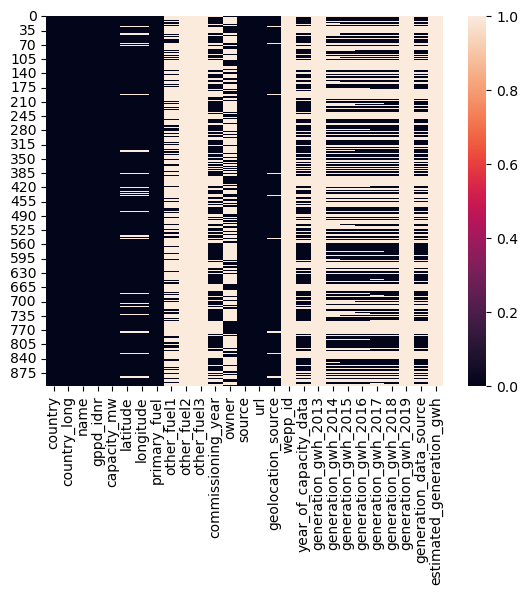

In [7]:
sns.heatmap(df.isnull())

In [8]:
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

There are few columns like Country, Country_long, other_fuel2, year_of_capacity_data  and generation_data_source which just 1 value. So we can drop them aswell

In [9]:
df.drop(columns=["country","country_long",'url','year_of_capacity_data',
                 'gppd_idnr','owner','other_fuel3','other_fuel2',
                 'estimated_generation_gwh','wepp_id', 'other_fuel1', 'generation_gwh_2013', 
                 'generation_gwh_2019',  'name', 'generation_data_source'],axis=1,inplace=True)
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,2016.0,Central Electricity Authority,WRI,NaN,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN


In [10]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,861.000000,861.000000,527.000000,398.000000,422.000000,434.000000,440.000000,448.000000
mean,326.223755,21.197918,77.464907,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.239612,4.939316,17.082868,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,16.773900,74.256200,1988.000000,223.557672,176.381063,188.285252,177.874930,193.378250
50%,59.200000,21.780000,76.719500,2001.000000,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.512400,79.440800,2012.000000,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900
max,4760.000000,34.649000,95.408000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


the only abnormality is in latitude and longitude where minimum value is 0 and the maximum value go up to 30000+.

Lets see the co-relation between columns

In [11]:
df.corr()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.051309,0.197129,0.304087,0.839094,0.844352,0.870620,0.886673,0.901918
latitude,0.051309,1.000000,0.036362,0.129902,0.060330,0.048610,0.041387,0.040568,0.040476
longitude,0.197129,0.036362,1.000000,0.121910,0.013511,0.022760,0.050732,0.048678,0.045599
commissioning_year,0.304087,0.129902,0.121910,1.000000,0.160014,0.170363,0.193743,0.191367,0.193694
generation_gwh_2014,0.839094,0.060330,0.013511,0.160014,1.000000,0.961098,0.937060,0.912561,0.902781
generation_gwh_2015,0.844352,0.048610,0.022760,0.170363,0.961098,1.000000,0.974918,0.940191,0.934371
generation_gwh_2016,0.870620,0.041387,0.050732,0.193743,0.937060,0.974918,1.000000,0.972024,0.962073
generation_gwh_2017,0.886673,0.040568,0.048678,0.191367,0.912561,0.940191,0.972024,1.000000,0.985856
generation_gwh_2018,0.901918,0.040476,0.045599,0.193694,0.902781,0.934371,0.962073,0.985856,1.000000


<Axes: >

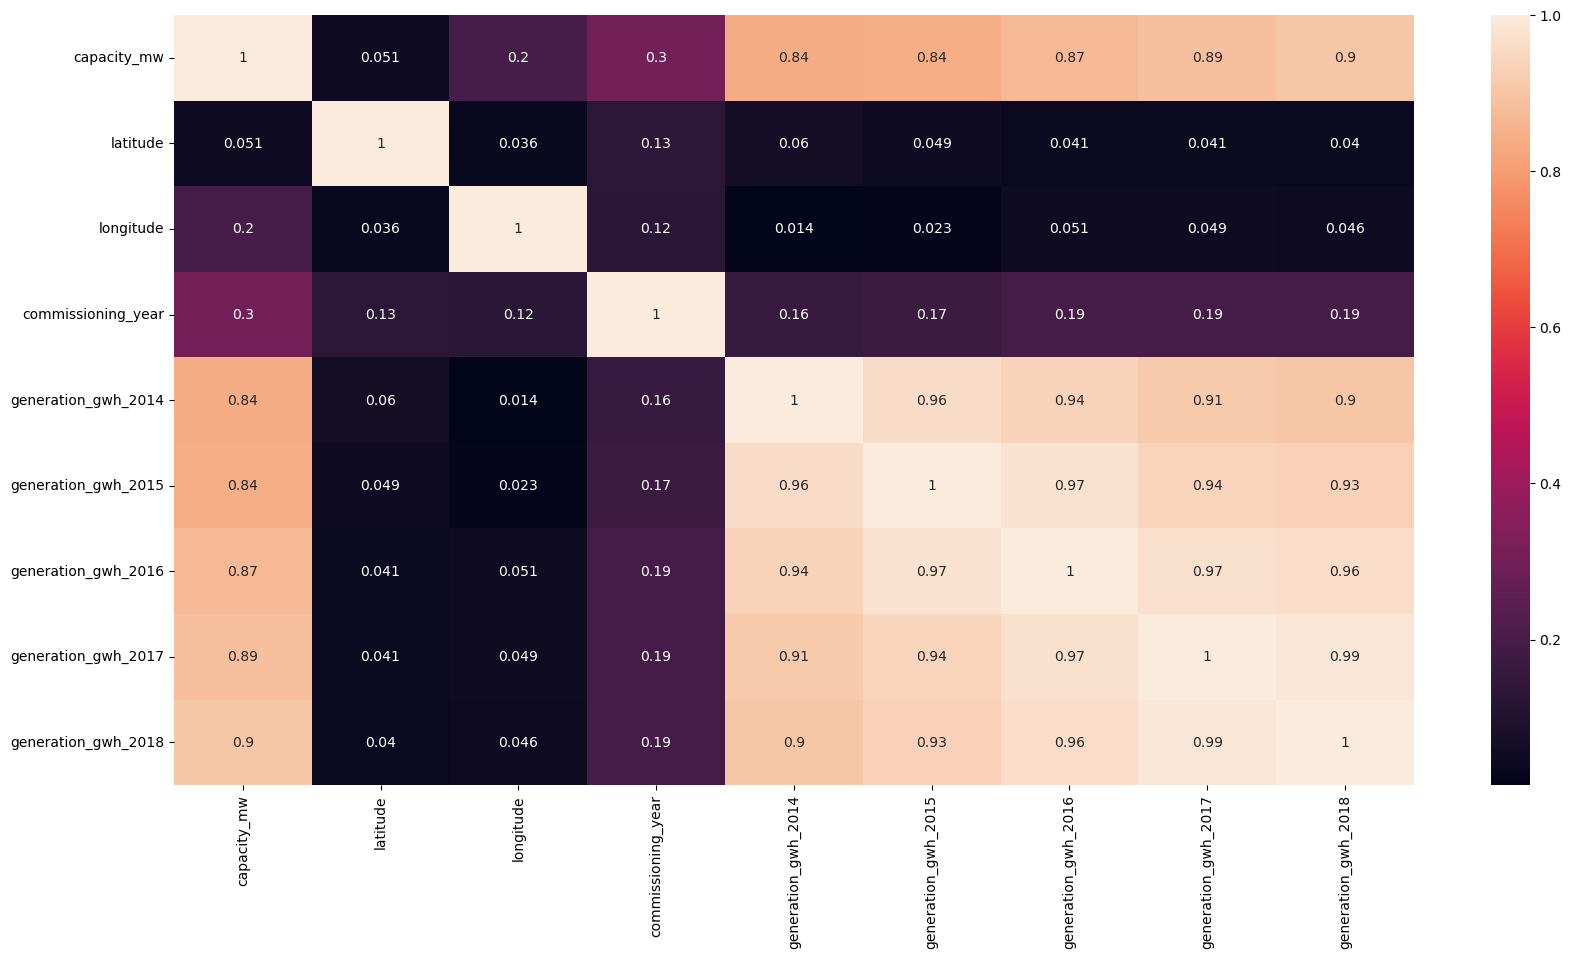

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

We can see that there is a good co-relation between all the generations gwh for each year, and also of those high correlation of those columns with capacity_mw.

In [13]:
df.skew()

capacity_mw            3.123576
latitude              -0.145866
longitude              1.112646
commissioning_year    -1.067949
generation_gwh_2014    3.342707
generation_gwh_2015    3.665904
generation_gwh_2016    3.512370
generation_gwh_2017    3.566070
generation_gwh_2018    3.476298
dtype: float64

here we can see there is a skewness in capacity_mw, and all the generation_gwh columns.

array([[<Axes: title={'center': 'capacity_mw'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>],
       [<Axes: title={'center': 'commissioning_year'}>,
        <Axes: title={'center': 'generation_gwh_2014'}>,
        <Axes: title={'center': 'generation_gwh_2015'}>],
       [<Axes: title={'center': 'generation_gwh_2016'}>,
        <Axes: title={'center': 'generation_gwh_2017'}>,
        <Axes: title={'center': 'generation_gwh_2018'}>]], dtype=object)

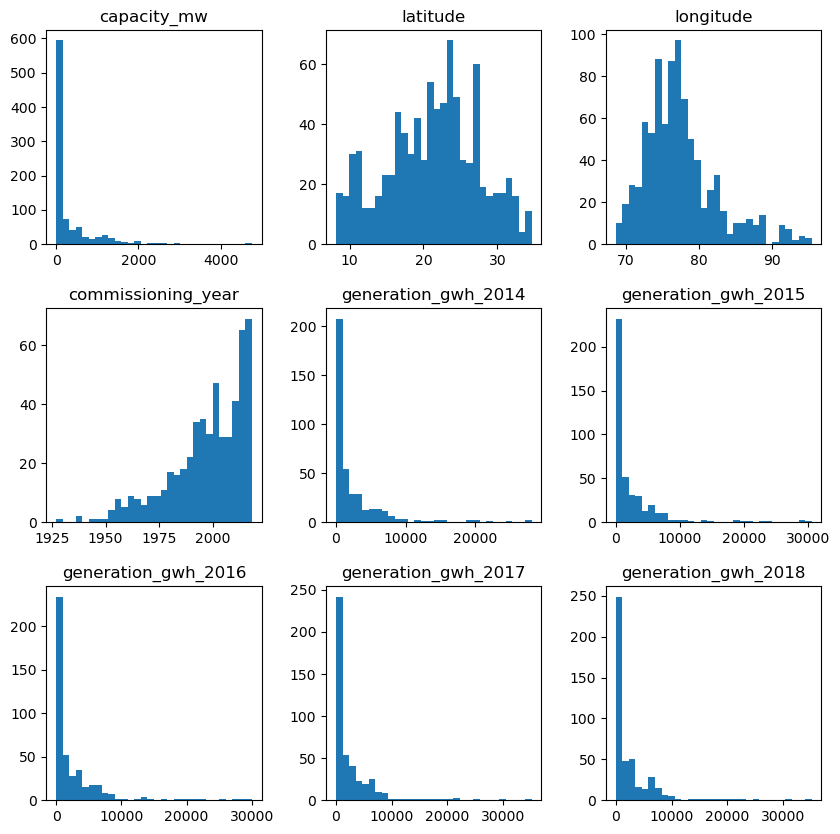

In [14]:
df.hist(figsize=(10,10), grid=False, bins = 30)

There is skewness in the capacity, and generation_gwh columns of each year, as well as negative skewness in commissioning_year as since more power plants were commissioned in the 2000s.

In [15]:
df.primary_fuel.value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

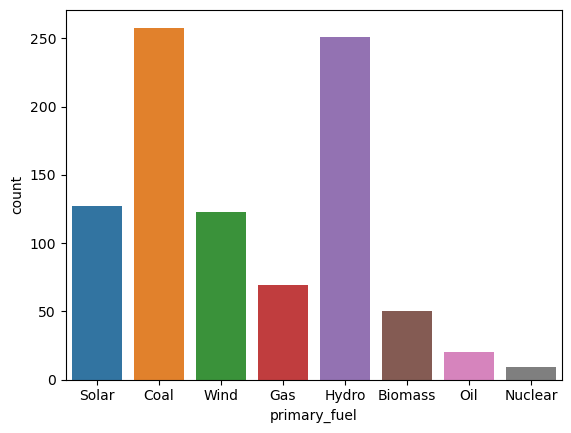

In [16]:
sns.countplot(x='primary_fuel',data=df)
plt.show()

Maximum Number of powerplant are coal based powerplant followed by Hydro energy based powerplants.
Around 40 % Power plant are Unconventional powerplant mainly based on Non Renewable energy resorces.
There are only 9 Nuclear powerplant. Usually these powerplant build for high capacity. It will be interesting to look for capacity of these powerplant.

Let us find Total Generation capacity of all powerplant, afterwards we will look for capacity of powerplant according to fuel type.

In [17]:
print('Total Power Generation Capacity of all Power Plants:',df['capacity_mw'].sum(),'MW')

Total Power Generation Capacity of all Power Plants: 295884.946 MW


In [18]:
df["capacity_mw"].groupby(df["primary_fuel"]).agg([sum])

,sum
primary_fuel,
Biomass,1003.260
Coal,205839.220
Gas,25172.506
Hydro,46441.770
Nuclear,8780.000
Oil,1778.840
Solar,2757.500
Wind,4111.850


Out of Total PowerGeneration Maximum comes from Coal.

<Axes: >

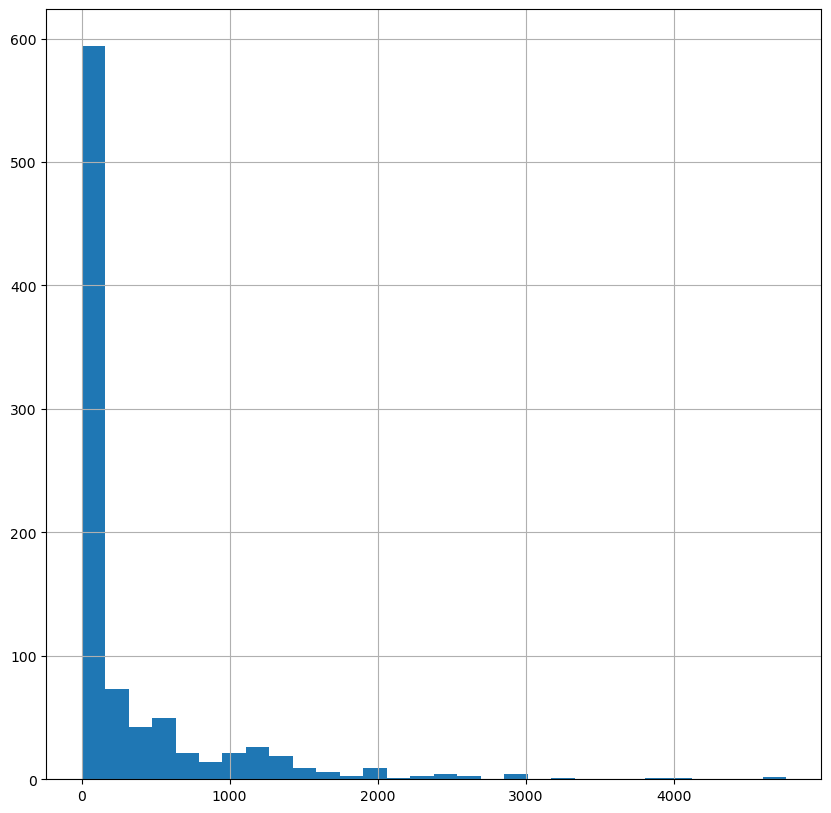

In [19]:
df['capacity_mw'].hist(figsize=(10,10), bins=30)

most powerplants have capacity in the 0-20 mw range so there is very high skewness in capacity_mw

<Axes: >

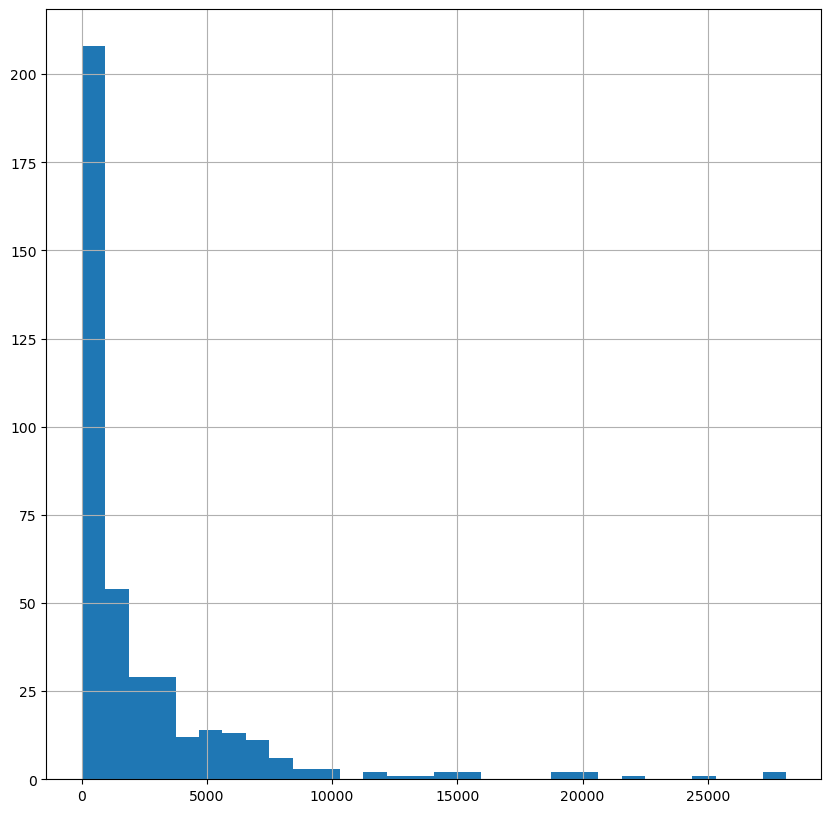

In [20]:
df['generation_gwh_2014'].hist(figsize=(10,10), bins=30)

High skewness in electricity generation in gigawatt-hours reported for the year 2014 due to high amount of low values.

<Axes: >

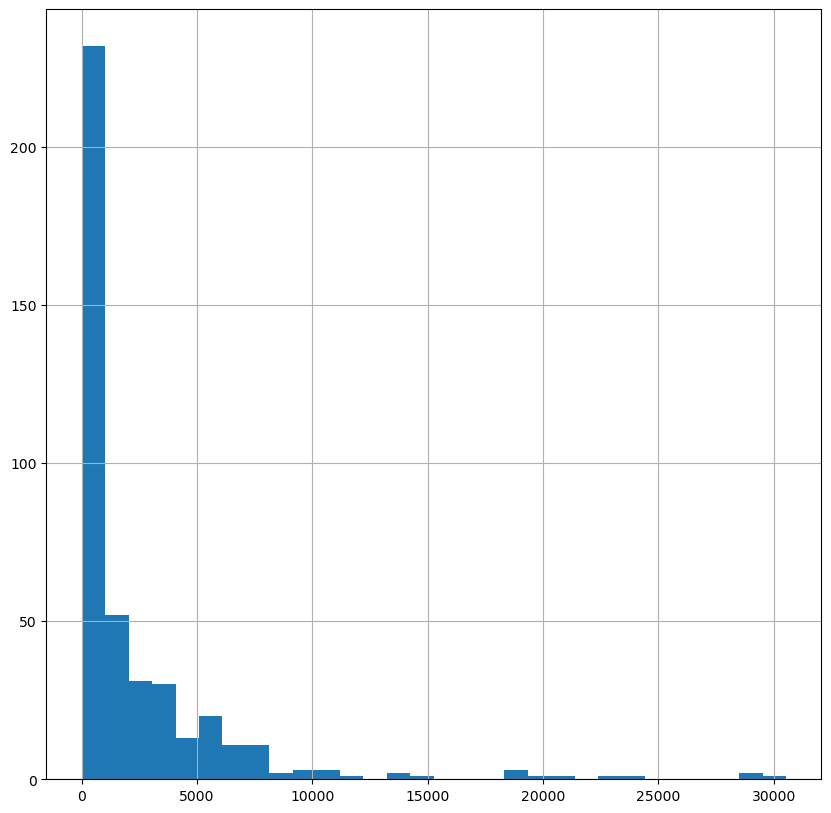

In [21]:
df['generation_gwh_2015'].hist(figsize=(10,10), bins=30)

High skewness in electricity generation in gigawatt-hours reported for the year 2015 due to high amount of low values.

<Axes: >

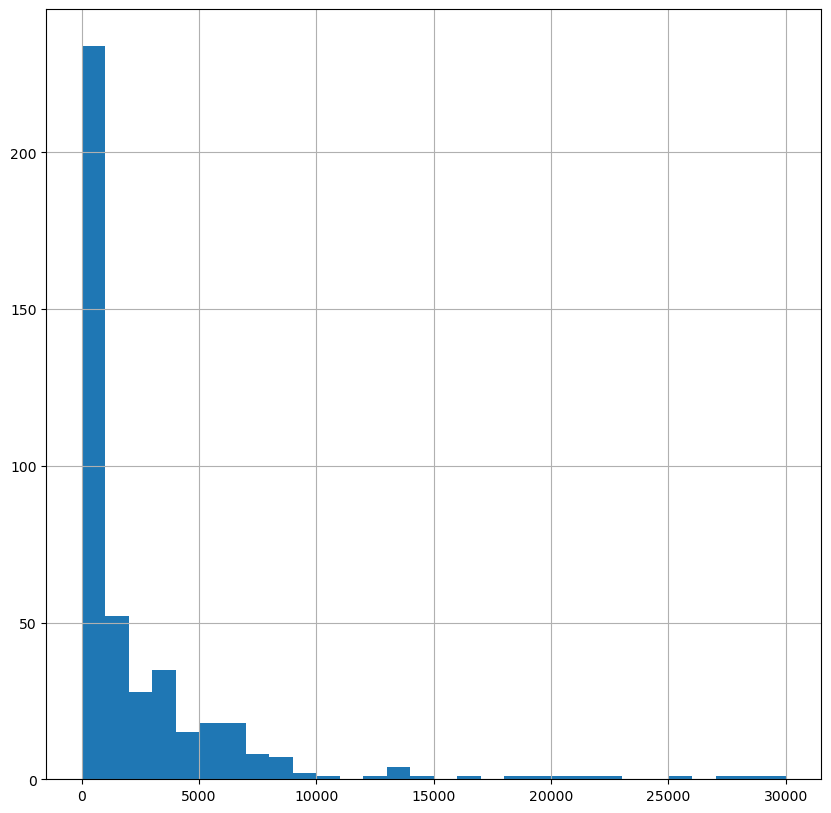

In [22]:
df['generation_gwh_2016'].hist(figsize=(10,10), bins=30)

High skewness in electricity generation in gigawatt-hours reported for the year 2016 due to high amount of low values.

<Axes: >

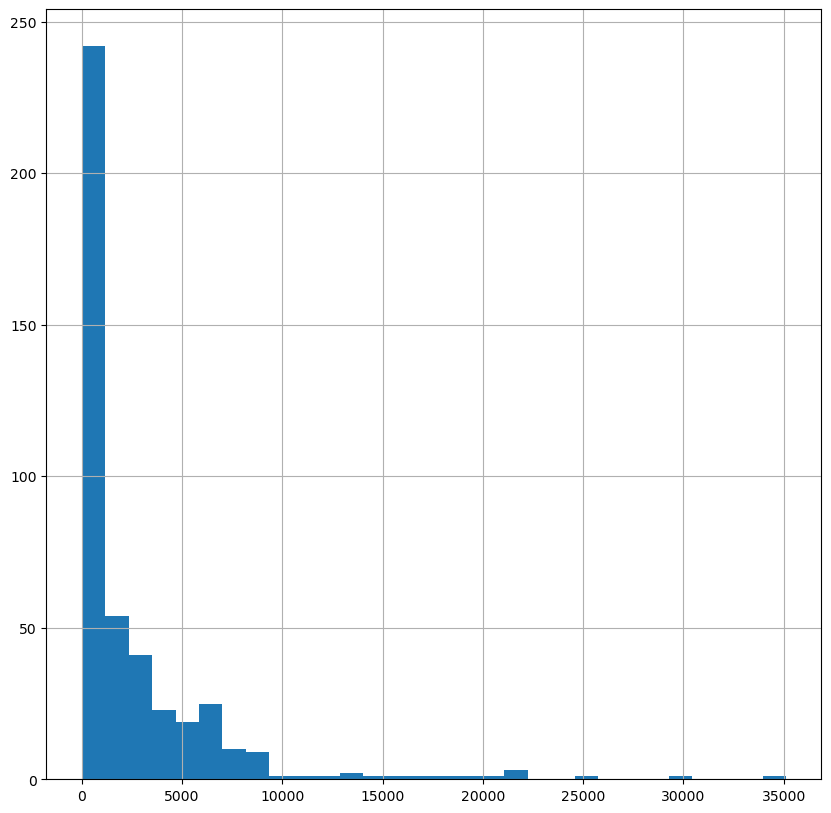

In [23]:
df['generation_gwh_2017'].hist(figsize=(10,10), bins=30)

High skewness in electricity generation in gigawatt-hours reported for the year 2017 due to high amount of low values.

<Axes: >

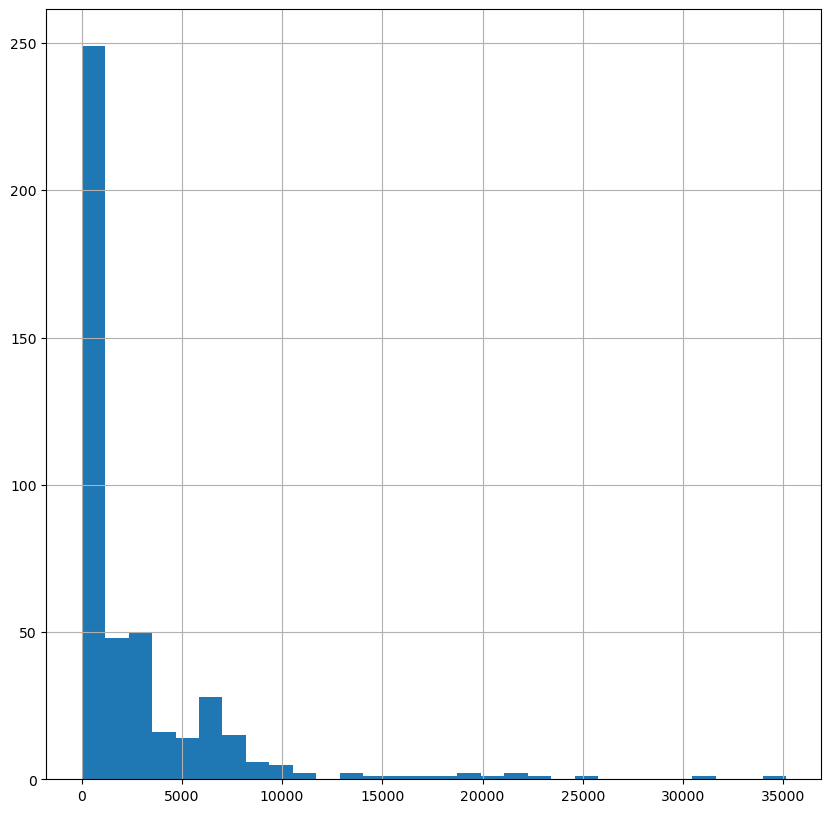

In [24]:
df['generation_gwh_2018'].hist(figsize=(10,10), bins=30)

High skewness in electricity generation in gigawatt-hours reported for the year 2018 due to high amount of low values.

Text(0.5, 1.0, 'Outliers in the columns')

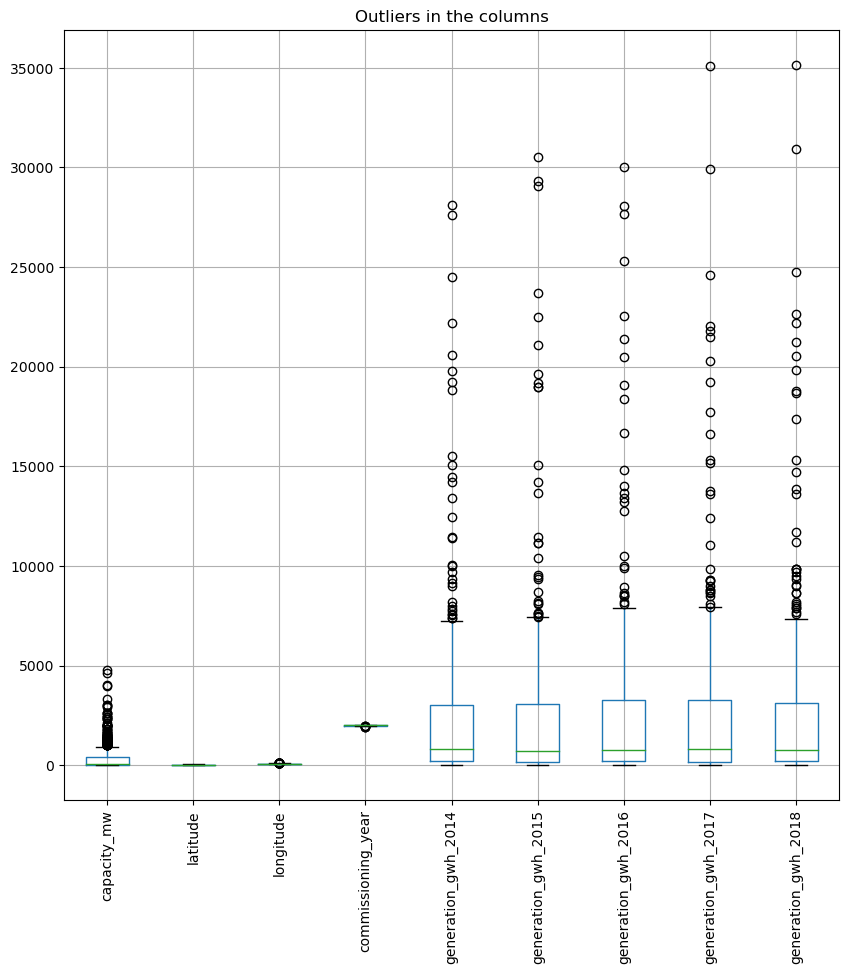

In [25]:
df.boxplot(figsize=(10,10))
plt.xticks(rotation= 90)
plt.title('Outliers in the columns')

There are several outliers present in every column except latitude.

generation_gwh column for every year has massive amount of outliers due to the high range

<Axes: ylabel='generation_gwh_2014'>

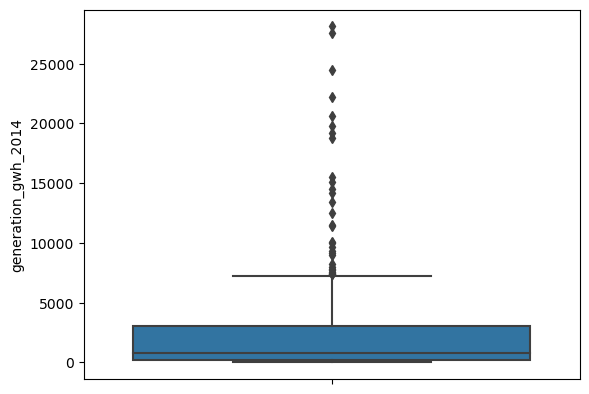

In [26]:
sns.boxplot(data=df, y='generation_gwh_2014')

Values above 7500 are outliers in generation_gwh for 2014 and they go nearly 30000

<Axes: ylabel='generation_gwh_2015'>

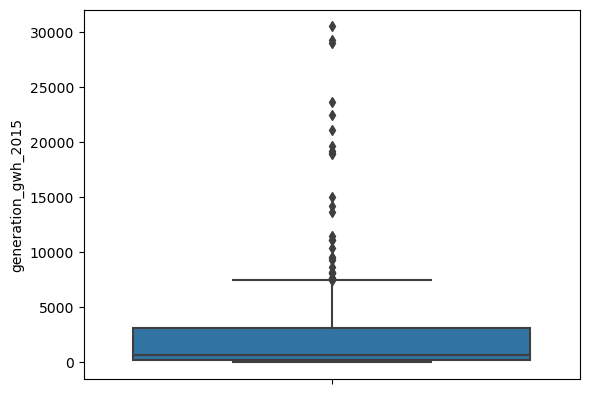

In [27]:
sns.boxplot(data=df, y='generation_gwh_2015')

Values above 7500 are outliers in generation_gwh for 2015 and they go upto around 35000

<Axes: ylabel='generation_gwh_2016'>

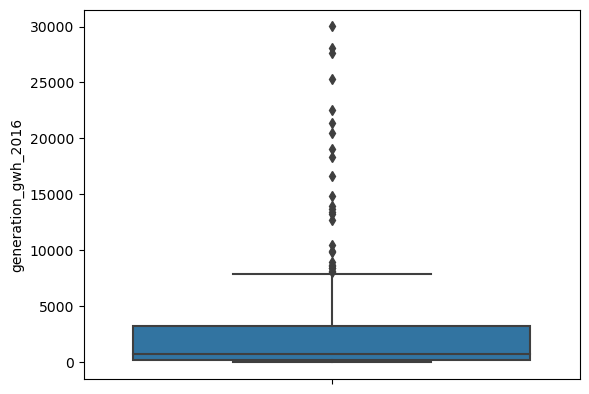

In [28]:
sns.boxplot(data=df, y='generation_gwh_2016')

Values above 7500 are outliers in generation_gwh for 2016 and they go upto 30000

<Axes: ylabel='generation_gwh_2017'>

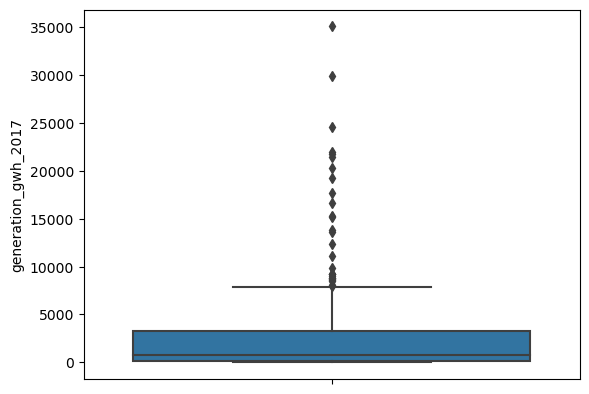

In [29]:
sns.boxplot(data=df, y='generation_gwh_2017')

Values above 7500 are outliers in generation_gwh for 2017 and they go upto or slightly more than 35000, which is the highest amount so far.

<Axes: ylabel='generation_gwh_2018'>

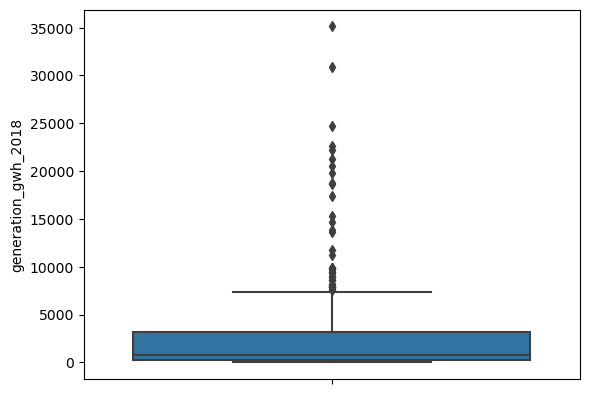

In [30]:
sns.boxplot(data=df, y='generation_gwh_2018')

Values above 7500 are outliers in generation_gwh for 2018 and they go upto 35000 which is as high as 2017.

So, generation_gwh in 2017 and 2018 has the highest values.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72]),
 [Text(0, 0, '1927.0'),
  Text(1, 0, '1937.0'),
  Text(2, 0, '1939.0'),
  Text(3, 0, '1943.0'),
  Text(4, 0, '1946.0'),
  Text(5, 0, '1949.0'),
  Text(6, 0, '1952.0'),
  Text(7, 0, '1953.0'),
  Text(8, 0, '1954.0'),
  Text(9, 0, '1955.0'),
  Text(10, 0, '1956.0'),
  Text(11, 0, '1957.0'),
  Text(12, 0, '1958.0'),
  Text(13, 0, '1959.0'),
  Text(14, 0, '1960.0'),
  Text(15, 0, '1961.0'),
  Text(16, 0, '1962.0'),
  Text(17, 0, '1963.0'),
  Text(18, 0, '1964.0'),
  Text(19, 0, '1965.0'),
  Text(20, 0, '1966.0'),
  Text(21, 0, '1967.0'),
  Text(22, 0, '1968.0'),
  Text(23, 0, '1969.0'),
  Text(24, 0, '1970.0'),
  Text(25, 0, '1971.0'),
  Text(26, 0, '1972.0'),
 

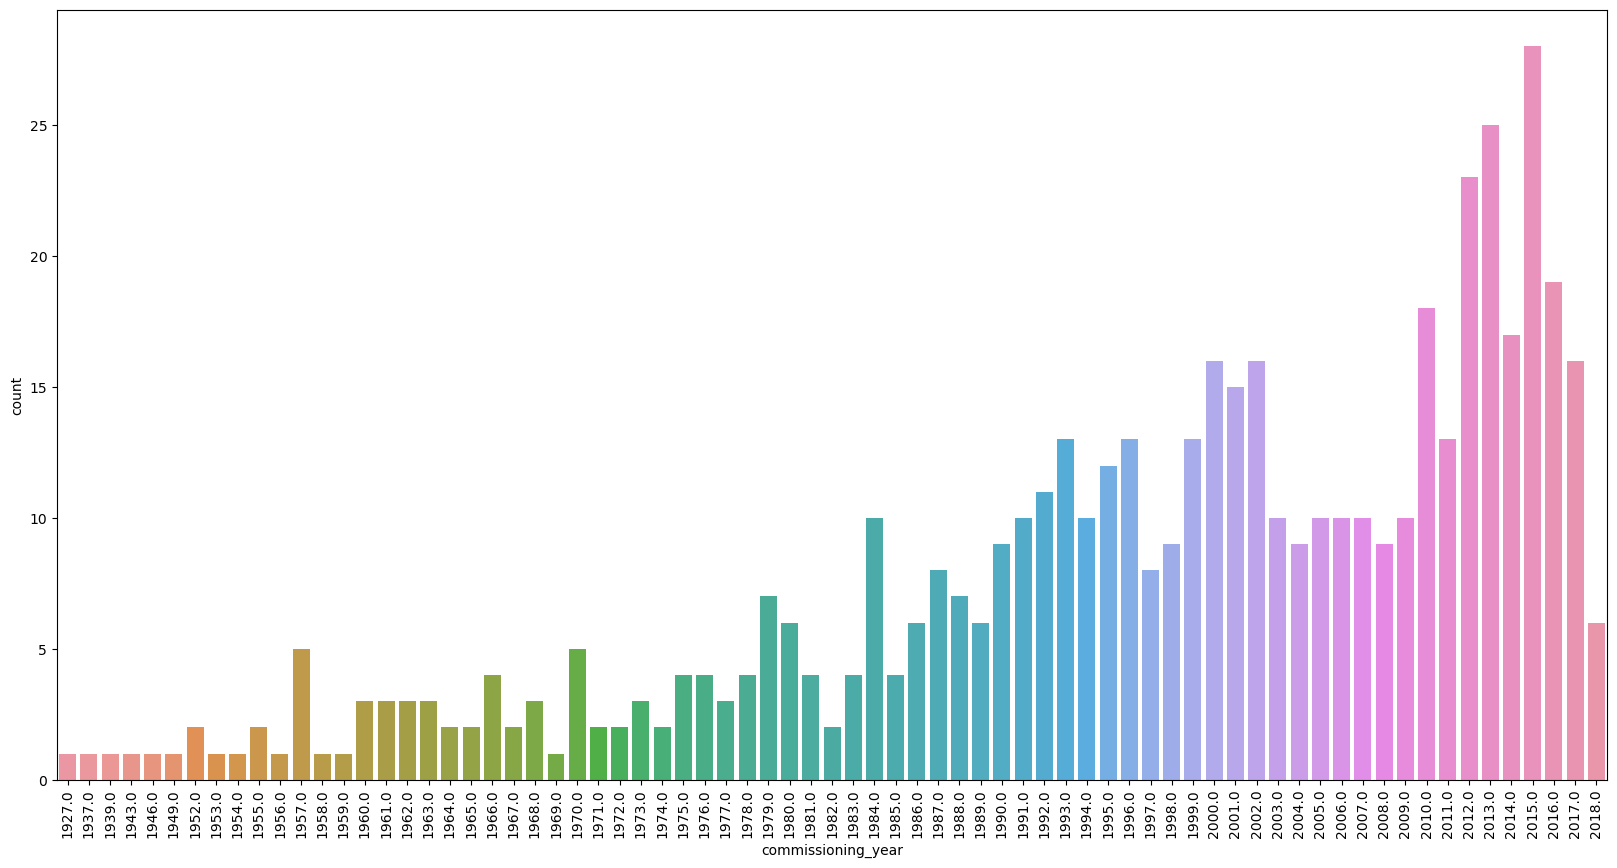

In [31]:
plt.figure(figsize=(20,10))
sns.countplot(data=df, x='commissioning_year')
plt.xticks(rotation=90)

The highest number of powerplants were commissioned in 2010-2017, with the single highest commission year being 2015, when around 28 powerplants were commissioned.

<Axes: xlabel='geolocation_source', ylabel='count'>

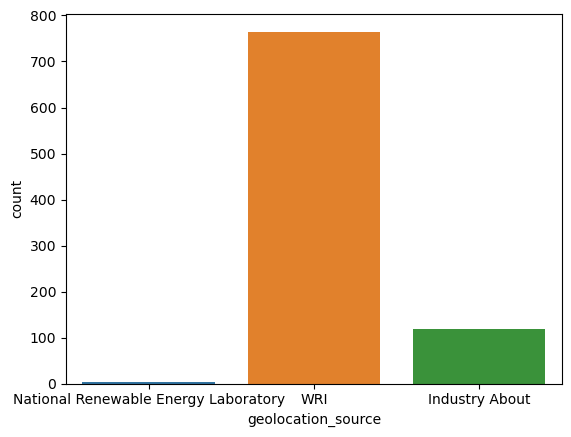

In [32]:
sns.countplot(data=df, x='geolocation_source')

Most geolocation information comes from WRI, and least from National Renewable Energy.

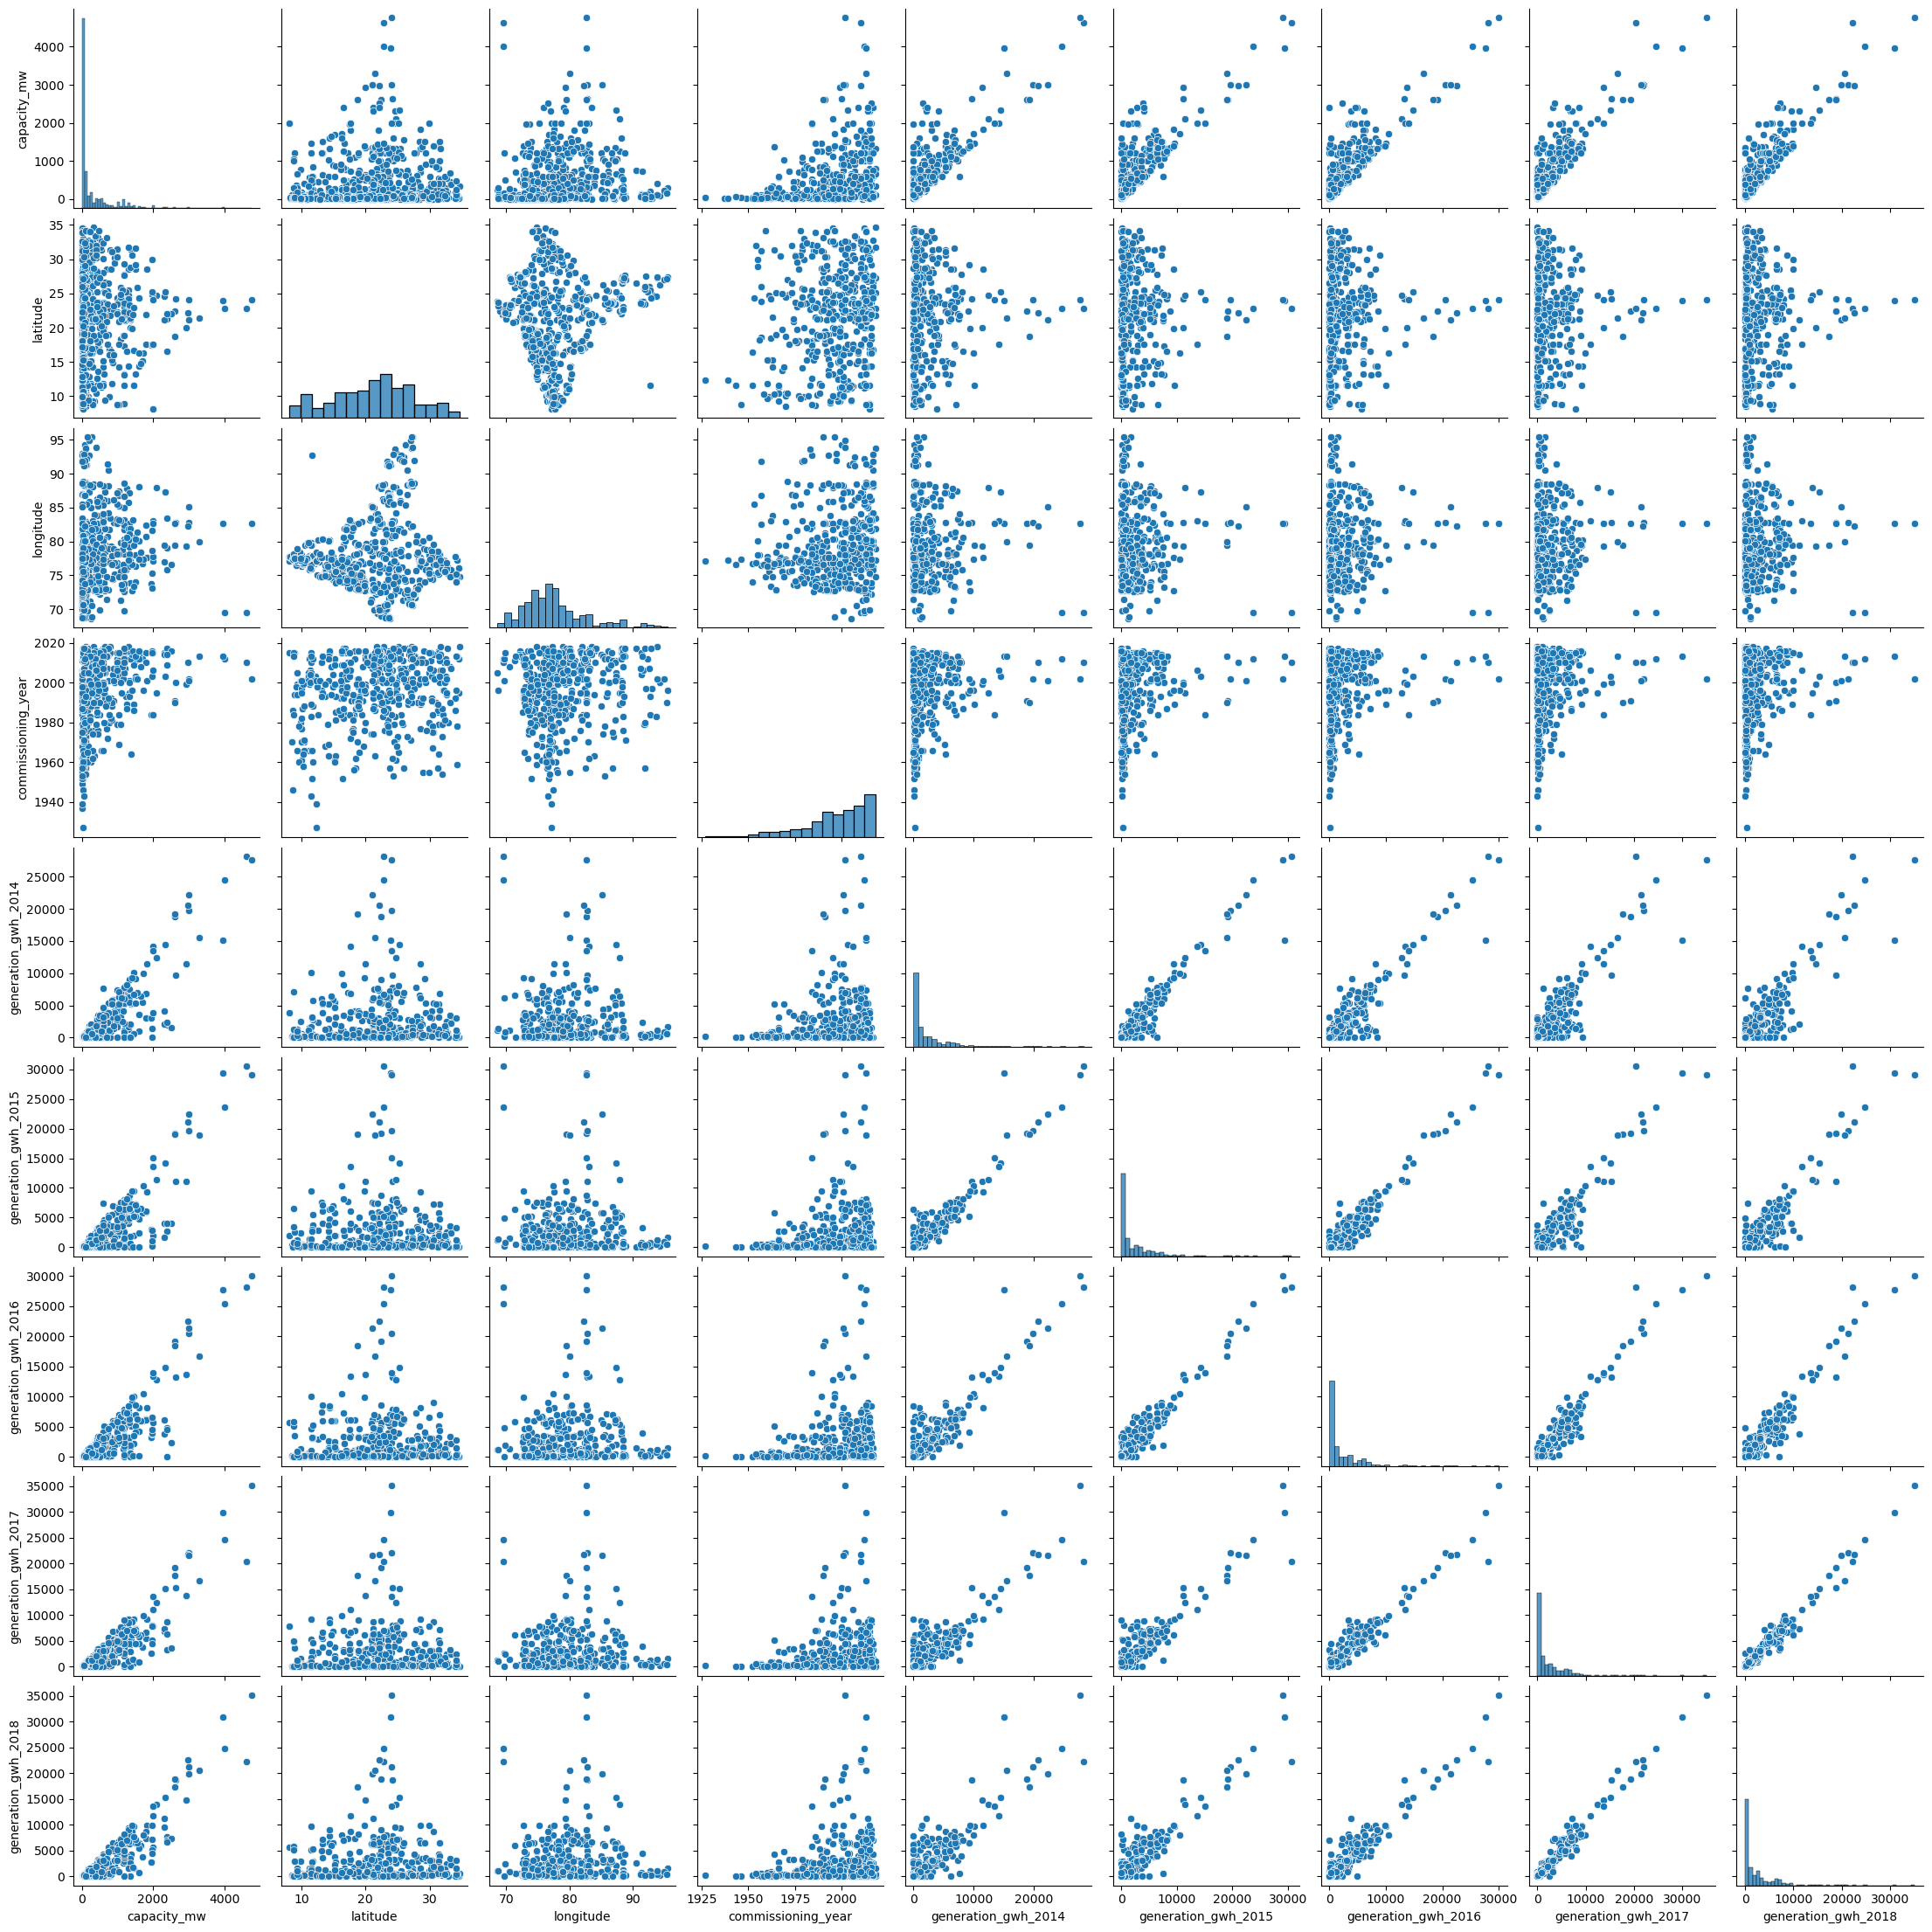

In [33]:
sns.pairplot(df)

<Axes: xlabel='commissioning_year', ylabel='capacity_mw'>

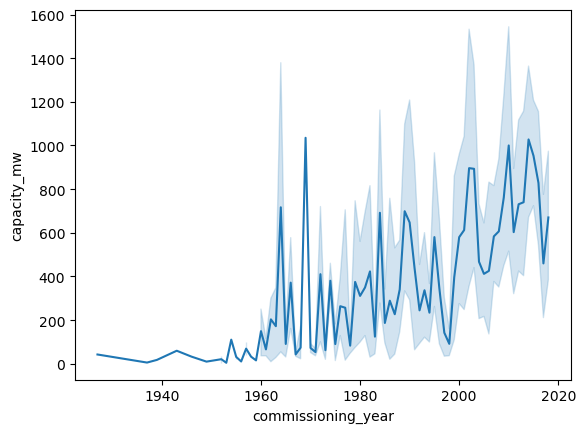

In [34]:
sns.lineplot(x=df['commissioning_year'], y=df['capacity_mw'])

We can see that as the years gave gone by, the capacity of powerplants has increased overall.

<Axes: xlabel='capacity_mw', ylabel='primary_fuel'>

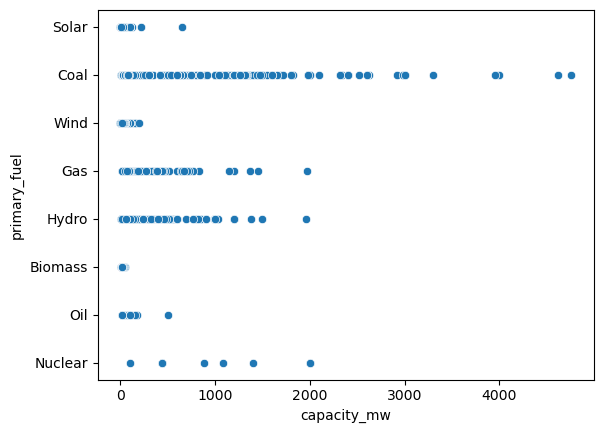

In [35]:
sns.scatterplot(x=df['capacity_mw'], y=df['primary_fuel'])

We can see that capacity for powerplants where coal is the primary fuel is higher.

<Axes: xlabel='commissioning_year', ylabel='primary_fuel'>

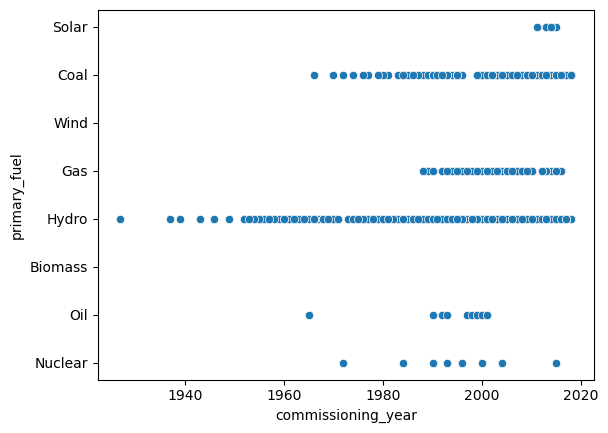

In [36]:
sns.scatterplot(x=df['commissioning_year'], y=df['primary_fuel'])

We can see that the oldest commissioned powerplants used hydro fuel. We can also see that solar fuel was only used from 2010s, and coal was used from the mid 1960s.

<Axes: xlabel='longitude', ylabel='latitude'>

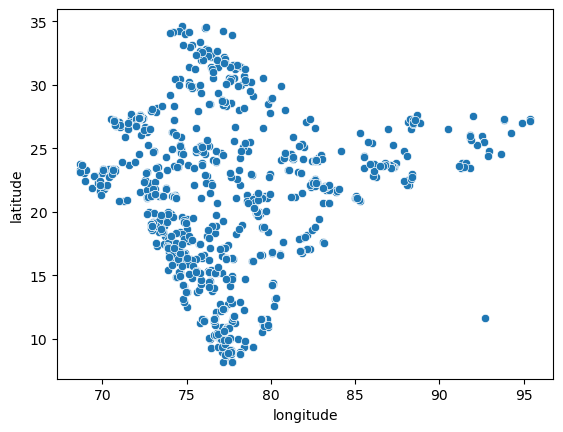

In [37]:
sns.scatterplot(x=df['longitude'], y=df['latitude'])

We can see that when we plot the longitude and latitude, the scatterplot looks very similar to the map of India. This means that the powerplants are spread across the country, with the majority being in the west.

<Axes: xlabel='geolocation_source', ylabel='primary_fuel'>

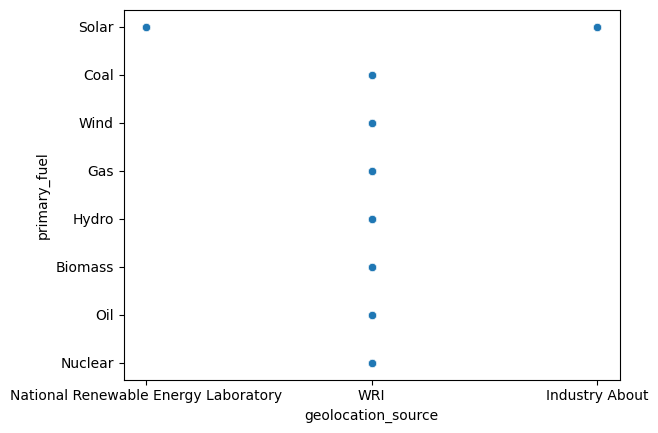

In [38]:
sns.scatterplot(x=df['geolocation_source'], y=df['primary_fuel'])

we can see that solar fuel is only used by national renewable energy lab and industry about, and WRI uses every other fuel except solar.

Imputing null values

In [39]:
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [40]:
imp = SimpleImputer()

In [41]:
df['latitude'] = imp.fit_transform(df['latitude'].values.reshape(-1,1))
df['longitude'] = imp.fit_transform(df['longitude'].values.reshape(-1,1))

latitude and longitude columns no longer have null values and they have been imputed using the mean

In [42]:
imp = SimpleImputer(strategy='median')
df['generation_gwh_2014'] = imp.fit_transform(df['generation_gwh_2014'].values.reshape(-1,1))
df['generation_gwh_2015'] = imp.fit_transform(df['generation_gwh_2015'].values.reshape(-1,1))
df['generation_gwh_2016'] = imp.fit_transform(df['generation_gwh_2016'].values.reshape(-1,1))
df['generation_gwh_2017'] = imp.fit_transform(df['generation_gwh_2017'].values.reshape(-1,1))
df['generation_gwh_2018'] = imp.fit_transform(df['generation_gwh_2018'].values.reshape(-1,1))

In [43]:
df.isnull().sum()

capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64

we can see that the generation_gwh columns no longer have null values. The null values have been replaced by the median, as that is a more accurate representation of the center than the mean.

In [44]:
imp = SimpleImputer(strategy='most_frequent')
df['geolocation_source'] = imp.fit_transform(df['geolocation_source'].values.reshape(-1,1))
df['commissioning_year'] = imp.fit_transform(df['commissioning_year'].values.reshape(-1,1))

In [45]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

Now there are no null values

In [46]:
df.commissioning_year.value_counts()

2015.0    408
2013.0     25
2012.0     23
2016.0     19
2010.0     18
         ... 
1946.0      1
1956.0      1
1937.0      1
1949.0      1
1953.0      1
Name: commissioning_year, Length: 73, dtype: int64

In [47]:
yr1 = list(range(1920,1930))
yr2 = list(range(1930,1940))
yr3 = list(range(1940,1950))
yr4 = list(range(1950,1960))
yr5 = list(range(1960,1970))
yr6 = list(range(1970,1980))
yr7 = list(range(1980,1990))
yr8 = list(range(1990,2000))
yr9 = list(range(2000,2010))
yr10 = list(range(2010,2020))

In [48]:
for i in yr1:
    df.loc[df['commissioning_year'] == i, 'commissioning_year'] = '1920s'
for i in yr2:
    df.loc[df['commissioning_year'] == i, 'commissioning_year'] = '1930s'
for i in yr3:
    df.loc[df['commissioning_year'] == i, 'commissioning_year'] = '1940s'
for i in yr4:
    df.loc[df['commissioning_year'] == i, 'commissioning_year'] = '1950s'
for i in yr5:
    df.loc[df['commissioning_year'] == i, 'commissioning_year'] = '1960s'
for i in yr6:
    df.loc[df['commissioning_year'] == i, 'commissioning_year'] = '1970s'
for i in yr7:
    df.loc[df['commissioning_year'] == i, 'commissioning_year'] = '1980s'
for i in yr8:
    df.loc[df['commissioning_year'] == i, 'commissioning_year'] = '1990s'
for i in yr9:
    df.loc[df['commissioning_year'] == i, 'commissioning_year'] = '2000s'
for i in yr10:
    df.loc[df['commissioning_year'] == i, 'commissioning_year'] = '2010s'

In [49]:
df['commissioning_year']

0      2010s
1      2010s
2      2010s
3      2000s
4      2010s
       ...  
902    2010s
903    2010s
904    2010s
905    2010s
906    2010s
Name: commissioning_year, Length: 907, dtype: object

<Axes: xlabel='commissioning_year', ylabel='count'>

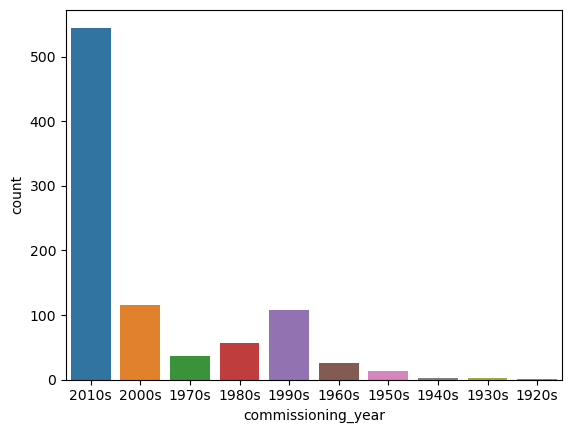

In [50]:
sns.countplot(x=df['commissioning_year'])

We can see that most powerplants were commissioned in the 2010s decade.

Combining generation values into an average generation_gwh column

In [51]:
df['average_generation_gwh'] = df[['generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 
                                   'generation_gwh_2017', 'generation_gwh_2018']].mean(axis=1)
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,average_generation_gwh
0,2.5,28.1839,73.2407,Solar,2010s,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375,763.826415
1,98.0,24.7663,74.6090,Coal,2010s,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,763.826415
2,39.2,21.9038,69.3732,Wind,2010s,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,763.826415
3,135.0,23.8712,91.3602,Gas,2000s,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,727.510864
4,1800.0,21.9603,82.4091,Coal,2010s,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,5571.899947
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,2010s,Central Electricity Authority,WRI,801.123775,0.994875,233.596650,865.400000,686.500000,517.523060
903,3.0,12.8932,78.1654,Solar,2010s,Karnataka Power Corporation Limited,Industry About,801.123775,711.181225,737.205450,817.977250,751.644375,763.826415
904,25.5,15.2758,75.5811,Wind,2010s,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,763.826415
905,80.0,24.3500,73.7477,Coal,2010s,Hindustan Zinc ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,763.826415


so now we can drop the individual generation columns.

In [52]:
df.drop(['generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 
         'generation_gwh_2018'], axis=1, inplace=True)
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,average_generation_gwh
0,2.5,28.1839,73.2407,Solar,2010s,National Renewable Energy Laboratory,National Renewable Energy Laboratory,763.826415
1,98.0,24.7663,74.6090,Coal,2010s,Ultratech Cement ltd,WRI,763.826415
2,39.2,21.9038,69.3732,Wind,2010s,CDM,WRI,763.826415
3,135.0,23.8712,91.3602,Gas,2000s,Central Electricity Authority,WRI,727.510864
4,1800.0,21.9603,82.4091,Coal,2010s,Central Electricity Authority,WRI,5571.899947
...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,2010s,Central Electricity Authority,WRI,517.523060
903,3.0,12.8932,78.1654,Solar,2010s,Karnataka Power Corporation Limited,Industry About,763.826415
904,25.5,15.2758,75.5811,Wind,2010s,CDM,WRI,763.826415
905,80.0,24.3500,73.7477,Coal,2010s,Hindustan Zinc ltd,WRI,763.826415


Removing skewness

In [53]:
df.skew()

capacity_mw               3.123576
latitude                 -0.149698
longitude                 1.141881
average_generation_gwh    5.381489
dtype: float64

In [54]:
df['average_generation_gwh'] = np.sqrt(df['average_generation_gwh'])

In [55]:
df.skew()

capacity_mw               3.123576
latitude                 -0.149698
longitude                 1.141881
average_generation_gwh    2.610527
dtype: float64

In [56]:
df['average_generation_gwh'] = np.sqrt(df['average_generation_gwh'])
df.skew()

capacity_mw               3.123576
latitude                 -0.149698
longitude                 1.141881
average_generation_gwh    0.850299
dtype: float64

In [57]:
df['longitude'] = np.sqrt(df['longitude'])
df.skew()

capacity_mw               3.123576
latitude                 -0.149698
longitude                 1.036861
average_generation_gwh    0.850299
dtype: float64

<Axes: xlabel='longitude', ylabel='Count'>

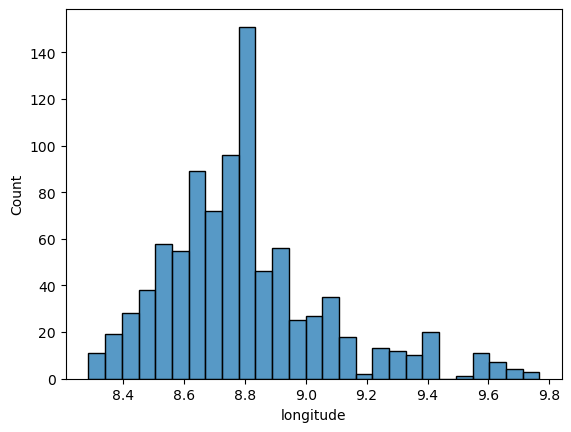

In [58]:
sns.histplot(df['longitude'])

It is now normally distributed

<Axes: ylabel='Frequency'>

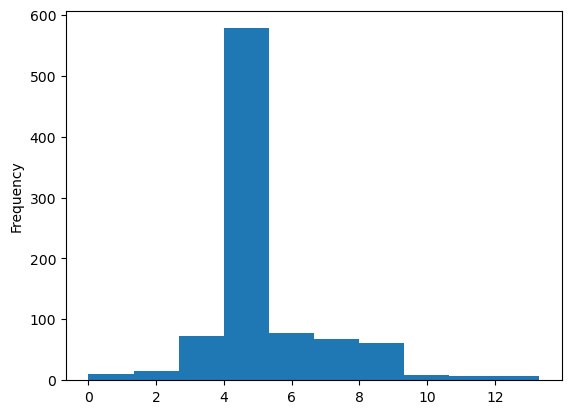

In [59]:
df['average_generation_gwh'].plot.hist()

Average generation is also normally distributed now

So, we can conclude that skewness has been removed from all numerical type columns

Encoding object type 

In [60]:
df.dtypes

capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel               object
commissioning_year         object
source                     object
geolocation_source         object
average_generation_gwh    float64
dtype: object

In [61]:
le = LabelEncoder()
list1 = ['primary_fuel', 'commissioning_year', 'source', 'geolocation_source']
for i in list1:
    df[i] = le.fit_transform(df[i].astype(str))

In [62]:
df.dtypes

capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel                int32
commissioning_year          int32
source                      int32
geolocation_source          int32
average_generation_gwh    float64
dtype: object

Now all the columns are numerical type.

In [63]:
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,average_generation_gwh
0,2.5,28.1839,8.558078,6,9,109,1,5.257129
1,98.0,24.7663,8.637650,1,9,174,2,5.257129
2,39.2,21.9038,8.329058,7,9,21,2,5.257129
3,135.0,23.8712,9.558253,2,8,22,2,5.193497
4,1800.0,21.9603,9.077946,1,9,22,2,8.639743
...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,8.795271,1,9,22,2,4.769605
903,3.0,12.8932,8.841120,6,9,77,0,5.257129
904,25.5,15.2758,8.693739,7,9,21,2,5.257129
905,80.0,24.3500,8.587648,1,9,59,2,5.257129


Checking multi-collinearity with Variance Inflation Factor

In [64]:
def vif_calc():
    vif = pd.DataFrame()
    vif['variables'] = df[0:-1].columns
    vif['VIF FACTOR'] = [variance_inflation_factor(df[0:-1].values,i) for i in range(df[0:-1].shape[1])]
    return vif

In [65]:
vif_calc()

,variables,VIF FACTOR
0,capacity_mw,3.594136
1,latitude,13.972018
2,longitude,79.078059
3,primary_fuel,4.751362
4,commissioning_year,31.024165
5,source,3.248499
6,geolocation_source,14.547560
7,average_generation_gwh,27.198236


There is slightly high vif factor in longitude

<Axes: >

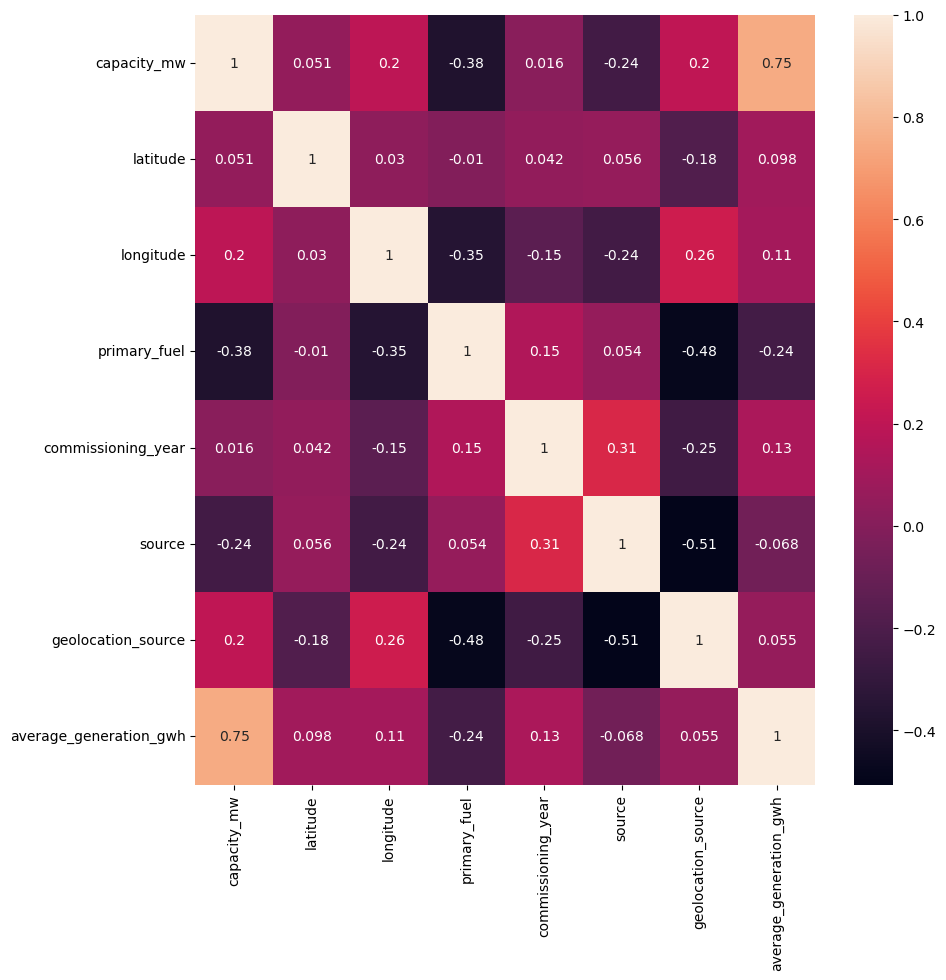

In [66]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

The correlation amongst columns it at a very normal level so we do not need to remove any columns.

Splitting data for training and testing

lets move the output column to the end

In [67]:
fuel = df['primary_fuel']
df.drop('primary_fuel', axis=1, inplace=True)
df['primary_fuel'] = fuel
df

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source,average_generation_gwh,primary_fuel
0,2.5,28.1839,8.558078,9,109,1,5.257129,6
1,98.0,24.7663,8.637650,9,174,2,5.257129,1
2,39.2,21.9038,8.329058,9,21,2,5.257129,7
3,135.0,23.8712,9.558253,8,22,2,5.193497,2
4,1800.0,21.9603,9.077946,9,22,2,8.639743,1
...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,8.795271,9,22,2,4.769605,1
903,3.0,12.8932,8.841120,9,77,0,5.257129,6
904,25.5,15.2758,8.693739,9,21,2,5.257129,7
905,80.0,24.3500,8.587648,9,59,2,5.257129,1


In [68]:
x = df.iloc[:,0:-1]
x

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source,average_generation_gwh
0,2.5,28.1839,8.558078,9,109,1,5.257129
1,98.0,24.7663,8.637650,9,174,2,5.257129
2,39.2,21.9038,8.329058,9,21,2,5.257129
3,135.0,23.8712,9.558253,8,22,2,5.193497
4,1800.0,21.9603,9.077946,9,22,2,8.639743
...,...,...,...,...,...,...,...
902,1600.0,16.2949,8.795271,9,22,2,4.769605
903,3.0,12.8932,8.841120,9,77,0,5.257129
904,25.5,15.2758,8.693739,9,21,2,5.257129
905,80.0,24.3500,8.587648,9,59,2,5.257129


In [69]:
y = df.iloc[:,-1]
y

0      6
1      1
2      7
3      2
4      1
      ..
902    1
903    6
904    7
905    1
906    7
Name: primary_fuel, Length: 907, dtype: int32

Models

In [70]:
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
en = ElasticNet()
knn = KNeighborsRegressor()
svr = SVR()
dtr = DecisionTreeRegressor()
rf = RandomForestRegressor()

In [71]:
models = [lr, ridge, lasso, en, knn, svr, dtr, rf]

In [72]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.54890755,  1.14980517, -0.88921445, ...,  1.46021461,
        -1.08334929, -0.1383538 ],
       [-0.38697729,  0.58731099, -0.59343924, ...,  2.91701919,
         0.3942414 , -0.1383538 ],
       [-0.48667885,  0.11617932, -1.74050019, ..., -0.51207465,
         0.3942414 , -0.1383538 ],
       ...,
       [-0.50990864, -0.97470651, -0.38495243, ..., -0.51207465,
         0.3942414 , -0.1383538 ],
       [-0.41749818,  0.51879322, -0.77930043, ...,  0.33959571,
         0.3942414 , -0.1383538 ],
       [-0.52516908, -1.85383409,  0.01779808, ..., -0.51207465,
         0.3942414 , -0.1383538 ]])

In [73]:
max_accu = 0
best_rs = 0

for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    reg = LinearRegression()
    reg.fit(x_train,y_train)
    y_pred = reg.predict(x_test)
    accuracy = r2_score(y_test,y_pred)
    if accuracy > max_accu:
        max_accu = accuracy
        best_rs = i
print('Best accuracy is ',max_accu, 'at random state ', best_rs)

Best accuracy is  0.5115541436869713 at random state  14


In [74]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2, random_state=64)

In [75]:
for i in models:
    i.fit(x_train,y_train)
    pred = i.predict(x_test)
    score=i.score(x_train,y_train)
    print(f'{i} had score of {round((score*100),2)}% and r2_score is {r2_score(y_test,pred)}')
    print('')

LinearRegression() had score of 45.87% and r2_score is 0.4471442868051718

Ridge() had score of 45.87% and r2_score is 0.4470775020861494

Lasso() had score of 6.38% and r2_score is 0.051571969840236154

ElasticNet() had score of 20.97% and r2_score is 0.1905496319874289

KNeighborsRegressor() had score of 81.2% and r2_score is 0.7583983010633912

SVR() had score of 65.73% and r2_score is 0.6365501760263881

DecisionTreeRegressor() had score of 100.0% and r2_score is 0.8507868472435065

RandomForestRegressor() had score of 98.83% and r2_score is 0.860500093737116



As the score is 98.78% I will proceed with random forest classifier

cross validation

In [76]:
# cross validation for Linear Regression
cvs1 = cross_val_score(lr,x_scaled,y,cv = 5)
print("Cross Validation Score for Linear Regression is ", cvs1.mean())

Cross Validation Score for Linear Regression is  0.43444942043287416


In [77]:
# cross validation for Ridge Regression
cvs2 = cross_val_score(ridge,x_scaled,y,cv = 5)
print("Cross Validation Score for Ridge Regression is ", cvs2.mean())

Cross Validation Score for Ridge Regression is  0.43451258050217856


In [78]:
# cross validation for Lasso Regression
cvs3 = cross_val_score(lasso,x_scaled,y,cv = 5)
print("Cross Validation Score for Lasso Regression is ", cvs3.mean())

Cross Validation Score for Lasso Regression is  0.02560816340117964


In [79]:
# cross validation for Elastic Net
cvs4 = cross_val_score(en,x_scaled,y,cv = 5)
print("Cross Validation Score for Elastic Net is ", cvs4.mean())

Cross Validation Score for Elastic Net is  0.18937839830498315


In [80]:
# cross validation for KNeighborsRegressor
cvs5 = cross_val_score(knn,x_scaled,y,cv = 5)
print("Cross Validation Score for KNeighborsRegressor is ", cvs5.mean())

Cross Validation Score for KNeighborsRegressor is  0.7124950247925431


In [81]:
# cross validation for SVR
cvs6 = cross_val_score(svr,x_scaled,y,cv = 5)
print("Cross Validation Score for SVR is ", cvs6.mean())

Cross Validation Score for SVR is  0.6064854981588484


In [82]:
# cross validation for DecisionTreeRegressor
cvs7 = cross_val_score(dtr,x_scaled,y,cv = 5)
print("Cross Validation Score for DecisionTreeRegressor is ", cvs7.mean())

Cross Validation Score for DecisionTreeRegressor is  0.8669887327377326


In [83]:
# cross validation for RandomForestRegressor
cvs8 = cross_val_score(rf,x_scaled,y,cv = 5)
print("Cross Validation Score for RandomForestRegressor is ", cvs8.mean())

Cross Validation Score for RandomForestRegressor is  0.901160530065866


So now I am going to pick RandomForestRegressor as my model

Hyper parameter Tuning

In [91]:
parameters = {'criterion': ['squared_error', 'absolute_error', 'poisson'],
              "n_estimators": [200,500],
              'min_samples_leaf': [1, 2],
              "min_samples_split" : [2,4]}

In [92]:
grid = GridSearchCV(rf, parameters, cv=5, n_jobs=-1)

In [93]:
grid.fit(x_train,y_train)
grid.best_params_

{'criterion': 'squared_error',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

In [94]:
rf = grid.best_estimator_

In [95]:
rf.fit(x_train, y_train)

RandomForestRegressor(min_samples_split=4, n_estimators=500)

In [96]:
pred1 = rf.predict(x_test)

In [97]:
r2_score(y_test, pred1)

0.8584116359026421

Model Saving

In [ ]:
file_name = 'Baseball_win_prediction.pickle'
pickle.dump(lasso,open(file_name,'wb'))